| | | |
|-|:--:|-|
|![IUT](/run/media/omarf/UnknownSSD/IUT/IUT_7th_Sem/EEE_4710/github/Hands-on-Machine-Learning-with-Python/My_Assignments/iut_logo/IUT_logo.png)|$$\textbf{\Large Islamic University of Technology (IUT)}\newline\textbf{\textit{\large Organization of Islamic Cooperation (OIC)} }\newline\text{ \normalsize Department of Electrical and Electronic Engineering }$$|![OIC](/run/media/omarf/UnknownSSD/IUT/IUT_7th_Sem/EEE_4710/github/Hands-on-Machine-Learning-with-Python/My_Assignments/iut_logo/OIC_logo.png)|


| **ID**             | **200021118**                                        |
| ------------------ | ---------------------------------------------------- |
| **Name**           | **Omar Faruk**                                       |
| **Course ID**      | **EEE 4710**                                         |
| **Course Name**    | **Artificial Intelligence and Machine Learning Lab** |
| **Assignment No.** | **4** (part 02)                                                |

# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler





In [2]:
# display in tabular form
def pdisplay(df , columns = None):
    if columns:
        display(pd.DataFrame(df , columns = columns))
    else:
        display(pd.DataFrame(df))

In [3]:
# Convert categorical data to numerical with mapping 
def cat_to_num(df , object_cols , print_map=False , get_map=False):
    for idx in object_cols:
        mapping_dict =  dict(zip(df[idx].value_counts().index.values , range(0, len(df[idx].value_counts().index.values) ) ))
        if print_map:
            print(f"{idx} : {mapping_dict}")
        df[idx] = df[idx].map(mapping_dict)
        
    return df

# Import Data

In [4]:
data = pd.read_csv('../data/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
pdisplay(data.isnull().sum() , ["null count"])

,null count
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


## X & y Split

In [6]:
ydata = data['price']
Xdata = data.drop('price' , axis = 1)

display(Xdata.head())
pdisplay(ydata.head())

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [7]:
# Xtrain , Xtest , ytrain , ytest = train_test_split(Xdara , ydata , test_size = 0.2 , random_state = 118)

# Analyze Data

In [8]:
pdisplay(Xdata.dtypes , ["Xdata"])

,Xdata
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object
parking,int64


In [9]:
pdisplay( pd.DataFrame(ydata).dtypes , ["ydata"])

,ydata
price,int64


In [10]:
Xdata.describe()

,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000
mean,5150.541284,2.965138,1.286239,1.805505,0.693578
std,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,6360.000000,3.000000,2.000000,2.000000,1.000000
max,16200.000000,6.000000,4.000000,4.000000,3.000000


In [11]:
object_cols = Xdata.dtypes.index[Xdata.dtypes == 'object']
num_cols = Xdata.dtypes.index[Xdata.dtypes != 'object']

print("object_cols =\n",object_cols.values)
print("num_cols =\n" , num_cols.values)

object_cols =
 ['mainroad' 'guestroom' 'basement' 'hotwaterheating' 'airconditioning'
 'prefarea' 'furnishingstatus']
num_cols =
 ['area' 'bedrooms' 'bathrooms' 'stories' 'parking']


In [12]:
for col_inx in object_cols:
    pdisplay( Xdata[col_inx].value_counts())

,count
mainroad,
yes,468
no,77


,count
guestroom,
no,448
yes,97


,count
basement,
no,354
yes,191


,count
hotwaterheating,
no,520
yes,25


,count
airconditioning,
no,373
yes,172


,count
prefarea,
no,417
yes,128


,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


# Identify Issues in the Dataset

- Categorical data needs to convert to Numerical

# Data visualization

# Convert Categorical to Numerical

In [13]:
Xdata = cat_to_num(Xdata , object_cols , print_map=True)
pdisplay(Xdata.dtypes , ['dtypes'])

mainroad : {'yes': 0, 'no': 1}
guestroom : {'no': 0, 'yes': 1}
basement : {'no': 0, 'yes': 1}
hotwaterheating : {'no': 0, 'yes': 1}
airconditioning : {'no': 0, 'yes': 1}
prefarea : {'no': 0, 'yes': 1}
furnishingstatus : {'semi-furnished': 0, 'unfurnished': 1, 'furnished': 2}


,dtypes
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,int64
guestroom,int64
basement,int64
hotwaterheating,int64
airconditioning,int64
parking,int64


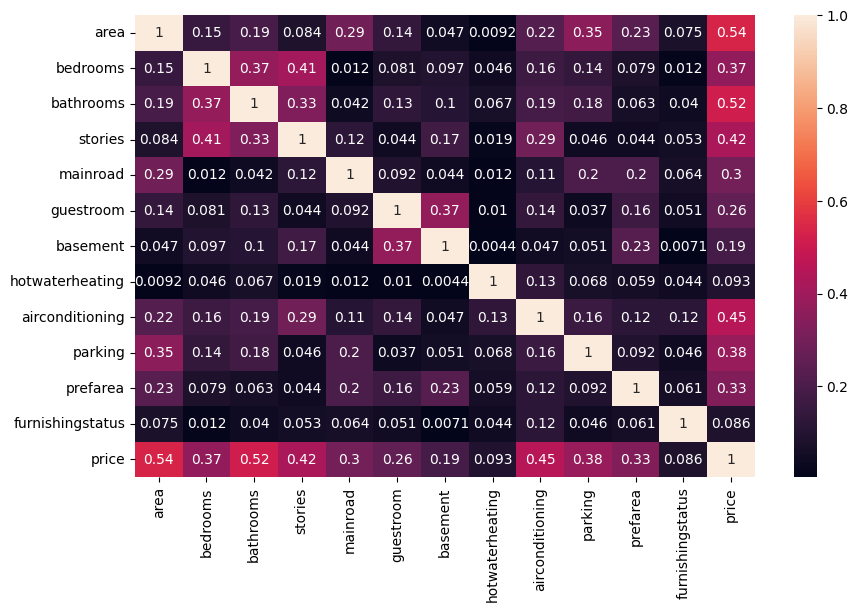

In [14]:
data = pd.concat([Xdata , ydata] , axis = 1)
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr().abs() , annot=True)
plt.show()

# Removing Irrelevant Reatures

- based on Correlation of the data it seems **furnishingstatus** , **hotwaterheating** has very low correlation with the other features.
- so, `['furnishingstatus' , 'hotwaterheating']` should be dropped.

In [15]:
irrelevant_cols = ['hotwaterheating' , 'furnishingstatus']

In [16]:
Xdata = Xdata.drop(irrelevant_cols , axis = 1)
Xdata.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea
0,7420,4,2,3,0,0,0,1,2,1
1,8960,4,4,4,0,0,0,1,3,0
2,9960,3,2,2,0,0,1,0,2,1
3,7500,4,2,2,0,0,1,1,3,1
4,7420,4,1,2,0,1,1,1,2,0


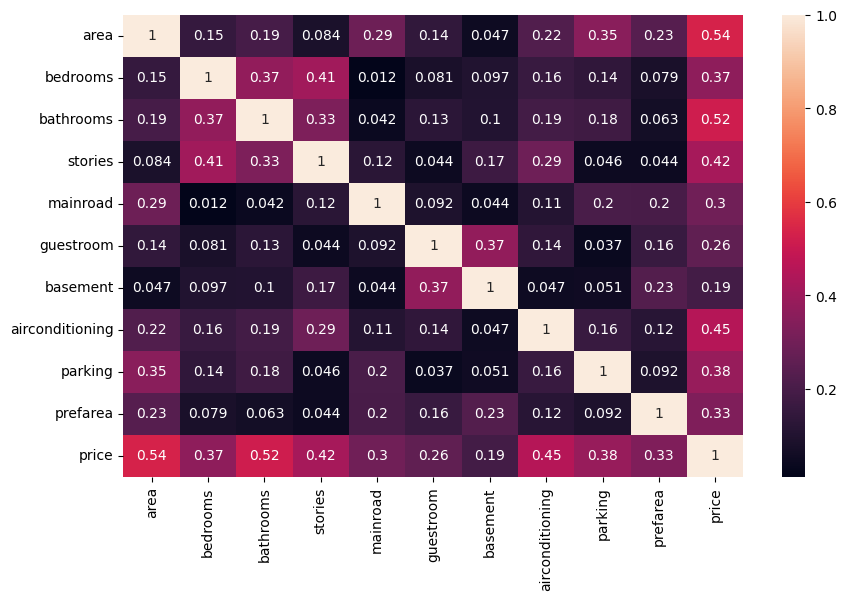

In [17]:
data = pd.concat([Xdata , ydata] , axis = 1)
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr().abs() , annot=True)
plt.show()

# Train & Test Split

In [18]:
Xtrain, Xtest , ytrain , ytest = train_test_split(Xdata , ydata , test_size = 0.2 , random_state = 118)

print(f"Xtrain : {Xtrain.shape} , \nXtest : {Xtest.shape} , \nytrain : {ytrain.shape} , \nytest : {ytest.shape}")

Xtrain : (436, 10) , 
Xtest : (109, 10) , 
ytrain : (436,) , 
ytest : (109,)


# Missing Data Handling

In [19]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

Xtrain = pd.DataFrame(imp.fit_transform(Xtrain) , columns = Xtrain.columns)

Xtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea
0,5000.0,3.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5450.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9166.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0
3,2145.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
4,4320.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0


# Normalization

In [20]:
norm = StandardScaler()

Xtrain = pd.DataFrame(norm.fit_transform(Xtrain) , columns = Xtrain.columns)

Xtrain.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea
count,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,436.000000,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02
mean,3.259370e-17,-9.676256e-17,-2.118591e-16,1.079666e-16,6.315030e-17,0.000000,-4.074213e-17,2.138962e-17,1.018553e-18,-4.889056e-17
std,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00
min,-1.517485e+00,-2.672646e+00,-5.566608e-01,-9.159680e-01,-3.799434e-01,-0.477670,-7.242068e-01,-7.058908e-01,-7.972964e-01,-5.667558e-01
25%,-7.316722e-01,-1.304954e+00,-5.566608e-01,-9.159680e-01,-3.799434e-01,-0.477670,-7.242068e-01,-7.058908e-01,-7.972964e-01,-5.667558e-01
50%,-2.554220e-01,6.273817e-02,-5.566608e-01,2.121734e-01,-3.799434e-01,-0.477670,-7.242068e-01,-7.058908e-01,-7.972964e-01,-5.667558e-01
75%,5.827785e-01,6.273817e-02,-2.441495e-02,2.121734e-01,-3.799434e-01,-0.477670,1.380821e+00,1.416650e+00,3.424453e-01,-5.667558e-01
max,4.983331e+00,4.165815e+00,5.830289e+00,2.468456e+00,2.631971e+00,2.093494,1.380821e+00,1.416650e+00,2.621929e+00,1.764428e+00


# Models

In [21]:
# Regression Models
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# # Classification Models
# from sklearn.neighbors import KNeighborsClassifier
# # from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC

# Machine Learning Pipelines
from sklearn.pipeline import Pipeline
# from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [22]:
svr = SVR()
lr = LinearRegression()
dtr = DecisionTreeRegressor()
knnr = KNeighborsRegressor()

In [23]:
def pipe_model(impute , normalize , model , Xtrain , ytrain , Xtest , ytest):
    # Impute Train data
    Xtrain = pd.DataFrame(impute.fit_transform(Xtrain) , columns = Xtrain.columns)
    # normalize Train data
    Xtrain = pd.DataFrame(normalize.fit_transform(Xtrain) , columns = Xtrain.columns)
    # model train
    model.fit(Xtrain , ytrain)

    # impute Test data
    Xtest = pd.DataFrame(impute.transform(Xtest) , columns = Xtest.columns)
    print(f"# Model : ===>\n ")
    # print(f"Model : {model} , \nAccuracy : {MAPE(ytest , model.predict(Xtest))}")
    print(f"Model : {model} , \nAccuracy : {model.score(Xtest , ytest)}")
    print("-------------------------------------------------\n")


In [24]:
models = [svr , lr , dtr , knnr]

In [25]:
for model in models:
    pipe_model(imp , norm , model , Xtrain , ytrain , Xtest , ytest)



# Model : ===>
 
Model : SVR() , 
Accuracy : -0.031987336952801204
-------------------------------------------------

# Model : ===>
 
Model : LinearRegression() , 
Accuracy : -2132520.377316415
-------------------------------------------------

# Model : ===>
 
Model : DecisionTreeRegressor() , 
Accuracy : -2.1961078363613233
-------------------------------------------------

# Model : ===>
 
Model : KNeighborsRegressor() , 
Accuracy : -0.5350777820240595
-------------------------------------------------

